## How to read the clustering products of the data release (DR) 1

### With **lsstypes**
[lsstypes](https://github.com/adematti/lsstypes) is a small Python package to handle summary statistics.
Only non-trivial dependency is numpy and h5py.
All files are written in hdf5 format, so if you'd rather not use **lsstypes**, you can look at the last cell of this notebook.

In [1]:
from pathlib import Path
# FIXME
# Download from /global/cfs/cdirs/desi/public/dr1/vac/dr1/dr1-fs-bao-clustering-measurements
base_dir = Path('/global/cfs/cdirs/desi/users/adematti/dr1_release/dr1-fs-bao-clustering-measurements')

If you are interested in the final likelihood, you can directly jump in to **Evaluate the likelihood**.
Data files that are presented beforehand are just intermediary products.

### Power spectrum

In [2]:
import numpy as np
import lsstypes as types

# Raw power spectrum measurements
data = types.read(base_dir / 'data/spectrum/spectrum-poles_LRG_GCcomb_z0.8-1.1.h5')
# poles
print(f'Multipoles are {data.ells}')
# k-coordinates [h/Mpc]
data.get(ells=0).coords('k')
# k-edges
data.get(ells=0).edges('k')  # dk = 0.001 h/Mpc in these files
# Shotnoise-subtracted power spectrum multipoles [(Mpc/h)^3]
poles = [data.get(ells=ell).value() for ell in data.ells]
# Other quantities are:
data.get(0).values()
# Shot noise is:
data.get(0).values('shotnoise')
# Effective measurement redshift is:
data.attrs['zeff']

# "corrected" power spectra (RIC and AMR)
data = types.read(base_dir / 'data/spectrum/spectrum-poles-corrected_LRG_GCcomb_z0.8-1.1.h5')
data.get(0).edges('k')  # 0.02 < k [h/Mpc] < 0.4, dk = 0.005 h/Mpc in these files

# "rotated" and "corrected" theta-cut power spectra
data = types.read(base_dir / 'data/spectrum/spectrum-poles-rotated-corrected_LRG_GCcomb_z0.8-1.1_thetacut0.05.h5')
data.get(0).edges('k');  # 0.02 < k [h/Mpc] < 0.2, dk = 0.005 h/Mpc in these files

Multipoles are [0, 2, 4]


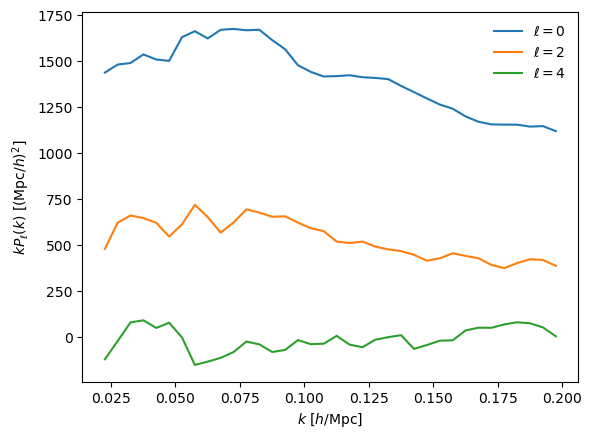

In [3]:
data.plot(show=True);

### Power spectrum window matrix
relates the theory galaxy power spectrum to the observed power spectrum.

In [4]:
window = types.read(base_dir / 'data/spectrum/window_spectrum-poles-rotated_LRG_GCcomb_z0.8-1.1_thetacut0.05.h5')
# For the following observable
print(f'Observed axis: {window.observable}, i.e. monopole, quadrupole, hexadecapole, total size of 120')
window.observable.get(0).edges('k')  # 0.02 < k [h/Mpc] < 0.2, dk = 0.005 h/Mpc
# For the following theory: power spectrum multipoles [0, 2, 4]
print(f'Theory axis: {window.theory}')
# Theory multipoles
window.theory.ells  # [0, 2, 4]
# Theory k
window.theory.get(0).coords('k')
# Window matrix value
window.value()  # numpy array
assert window.value().shape == (window.observable.size, window.theory.size)

Observed axis: Mesh2SpectrumPoles(labels=[{'ells': 0}, {'ells': 2}, {'ells': 4}], size=120), i.e. monopole, quadrupole, hexadecapole, total size of 120
Theory axis: Mesh2SpectrumPoles(labels=[{'ells': 0}, {'ells': 2}, {'ells': 4}], size=8502)


### Power spectrum systematic templates
Systematic shifts of the power spectrum.

In [5]:
template = types.read(base_dir / 'data/templates_spectrum/template_ric_spectrum-poles_LRG_GCcomb_z0.8-1.1_thetacut0.05.h5')
print(f'Multipoles: {data.ells}')
# k-coordinates [h/Mpc]
data.get(ells=0).coords('k')
# k-edges
data.get(ells=0).edges('k');  # dk = 0.005 h/Mpc in these files

Multipoles: [0, 2, 4]


### Power spectrum rotation
make the window matrix more diagonal after apply the $\theta$-cut to mitigate fiber assignment systematics.

In [6]:
rotation = types.read(base_dir / 'data/rotation/rotation_spectrum-poles_LRG_GCcomb_z0.8-1.1_thetacut0.05.h5')
# Dictionary with keys "M", "mo", "mt", "s", which match eq. 5.4 - 5.6 of [Pinon et al. 2024](https://ui.adsabs.harvard.edu/abs/2025JCAP...01..131P/abstract)
# If you'd like to apply the rotation to power spectrum measurements, window matrix, covariance matrix yourself
# See the script prepare_fiducial_likelihood.py
print(f'Rotation ingredients: {list(rotation.keys())}')

Rotation ingredients: ['M', 'mo', 'mt', 'observable', 's', 'theory']


### Correlation function
used for BAO measurements.

In [7]:
data = types.read(base_dir / 'data/recsym/correlation/counts-recsym-smu_LRG_GCcomb_z0.8-1.1.h5')
print('Collection of pair counts: {data}')
# Normalized DD counts
data.get('DD').value()
# s-edges [Mpc/h], mu-edges
data.edges('s'), data.edges('mu')    # 0 < s [Mpc/h] < 200, ds = 1 Mpc/h

# Correlation function multipoles
data = types.read(base_dir / 'data/recsym/correlation/correlation-recsym-poles_LRG_GCcomb_z0.8-1.1.h5')
print(f'Correlation function multipoles: {data}')
# s-coordinates [Mpc/h]
data.get(0).coords('s')  # 0 < s [Mpc/h] < 200, ds = 4 Mpc/h
# Monopole
data.get(0).value();

Collection of pair counts: {data}
Correlation function multipoles: Count2CorrelationPoles(labels=[{'ells': 0}, {'ells': 2}, {'ells': 4}], size=150)


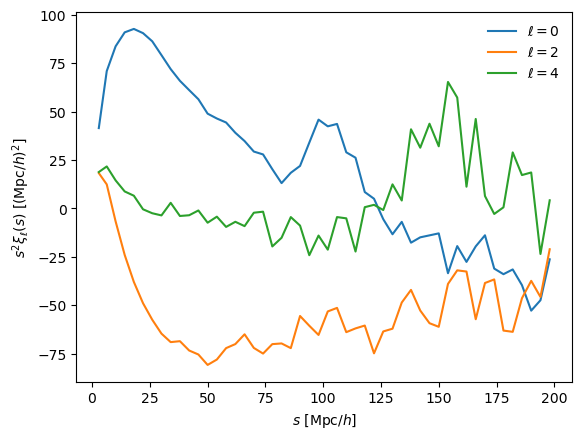

In [8]:
data.plot(show=True);

### Correlation function (rebinning) window matrix

In [9]:
# (rebinning) window matrix
window = types.read(base_dir / 'data/recsym/correlation/window_correlation-recsym-poles_LRG_GCcomb_z0.8-1.1.h5')
# For the following observable
print(f'Observed axis: {window.observable}, i.e. monopole, quadrupole, hexadecapole, total size of 150')
window.observable.get(0).edges('s')  # 0 < s [Mpc/h] < 200, ds = 4 Mpc/h
# For the following theory: power spectrum multipoles [0, 2, 4]
print(f'Theory axis: {window.theory}')
# Theory multipoles
window.theory.ells  # [0, 2, 4]
# Theory s
window.theory.get(0).coords('s')
# Window matrix value
window.value()  # numpy array
assert window.value().shape == (window.observable.size, window.theory.size)

Observed axis: Count2CorrelationPoles(labels=[{'ells': 0}, {'ells': 2}, {'ells': 4}], size=150), i.e. monopole, quadrupole, hexadecapole, total size of 150
Theory axis: Count2CorrelationPoles(labels=[{'ells': 0}, {'ells': 2}, {'ells': 4}], size=600)


### Covariance matrix

Covariance for Mesh2SpectrumPoles(labels=[{'ells': 0}, {'ells': 2}, {'ells': 4}], size=240)
Covariance for ObservableTree(labels=[{'observables': 'spectrum'}, {'observables': 'baorecon'}], size=242)


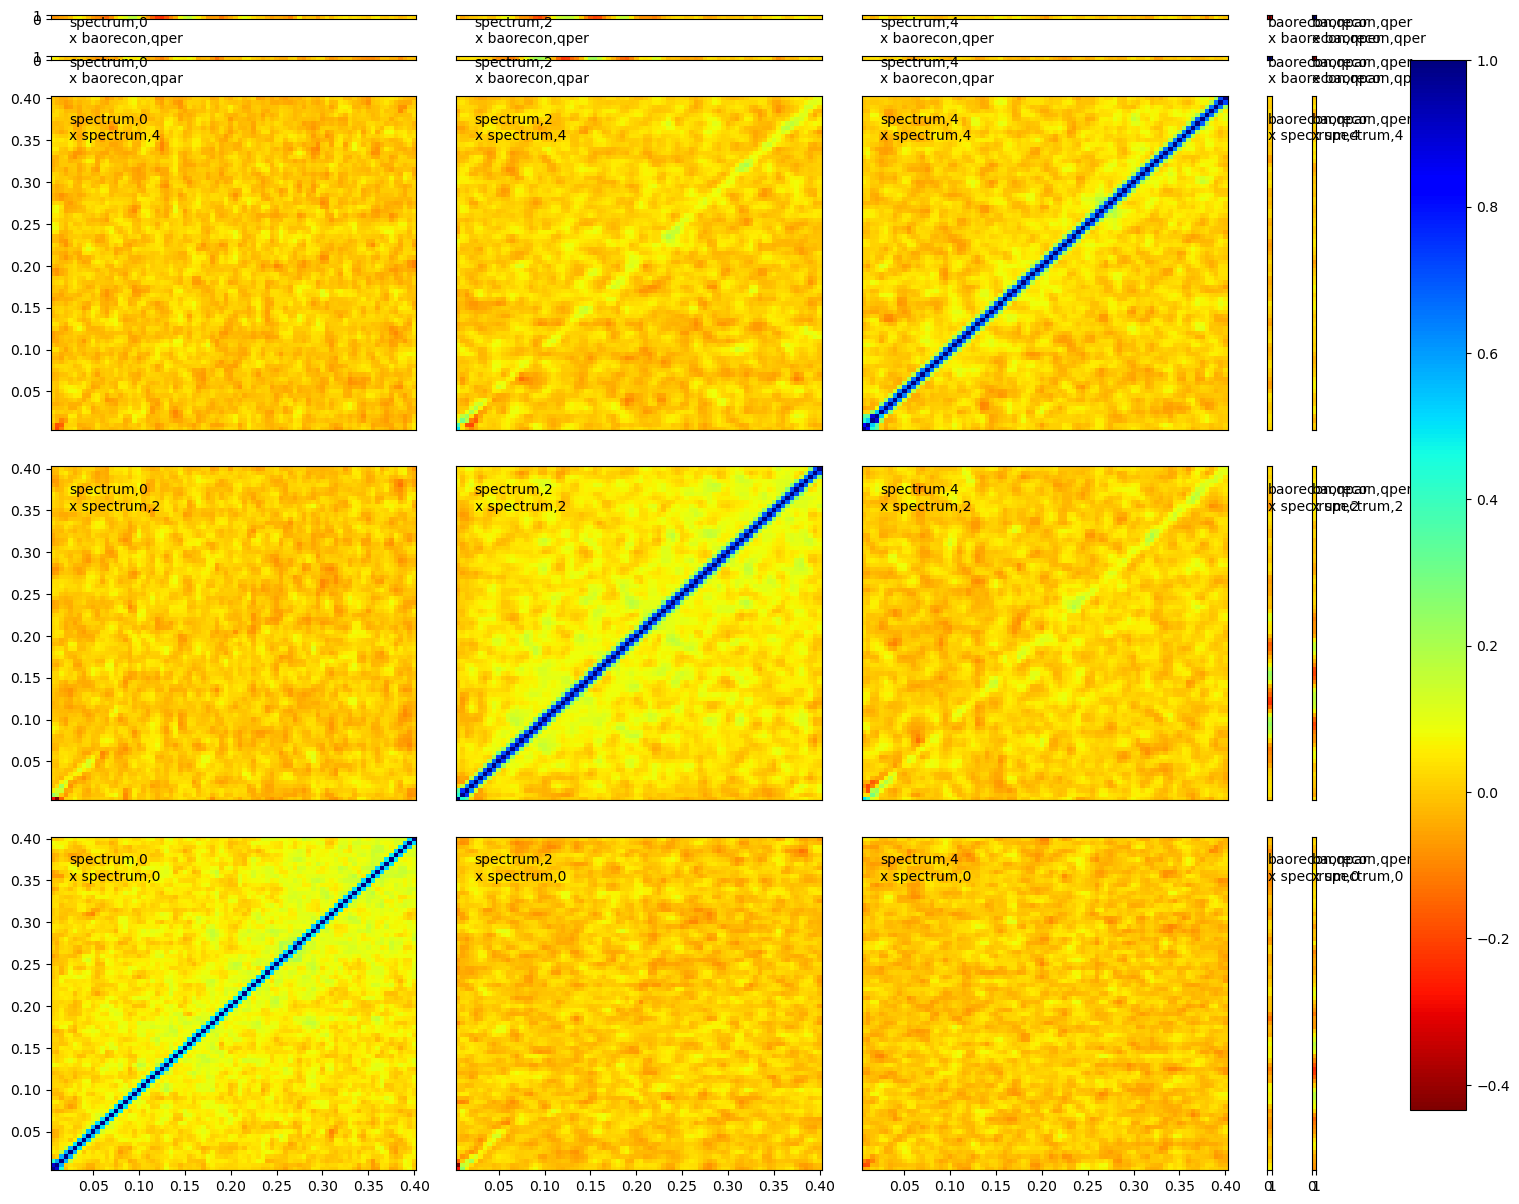

In [10]:
# EZmock-based covariance matrix for rotated theta-cut power spectrum
covariance = types.read(base_dir / 'data/covariance/EZmock/covariance_spectrum-poles-rotated_LRG_GCcomb_z0.8-1.1_thetacut0.05.h5')
# For the observable
print(f'Covariance for {covariance.observable}')
# With binning
covariance.observable.get(ells=0).edges('k')  # 0 < k [h/Mpc] < 0.4, dk = 0.005 h/Mpc
# Covariance matrix value
covariance.value()  # numpy array
assert covariance.value().shape == (covariance.observable.size,) * 2
covariance_spectrum = covariance

# Joint [rotated theta-cut power spectrum, BAO parameters] covariance matrix
covariance = types.read(base_dir / 'data/covariance/EZmock/covariance_spectrum-poles-rotated+bao-recon_LRG_GCcomb_z0.8-1.1_thetacut0.05.h5')
print(f'Covariance for {covariance.observable}')
# With binning
covariance.observable.get(observables='spectrum', ells=0).edges('k')
# Covariance matrix value
covariance.value()  # numpy array
assert covariance.value().shape == (covariance.observable.size,) * 2
# To restrict to one observable
subcov = covariance.at.observable.get('spectrum')
assert np.allclose(subcov.value(), covariance_spectrum.value())
covariance.plot(corrcoef=True, show=True);

In [11]:
# Post-reconstruction correlation covariance matrix
covariance = types.read(base_dir / 'data/covariance/RascalC/covariance_correlation-recsym-poles_LRG_GCcomb_z0.8-1.1.h5')
print(covariance.observable)
# With binning
covariance.observable.get(ells=0).edges('s');  # 20 < s [Mpc/h] < 200, ds = 4 Mpc/h

Count2CorrelationPoles(labels=[{'ells': 0}, {'ells': 2}, {'ells': 4}], size=135)


### Plot of the observables
Let's plot the data points with the uncertainties.

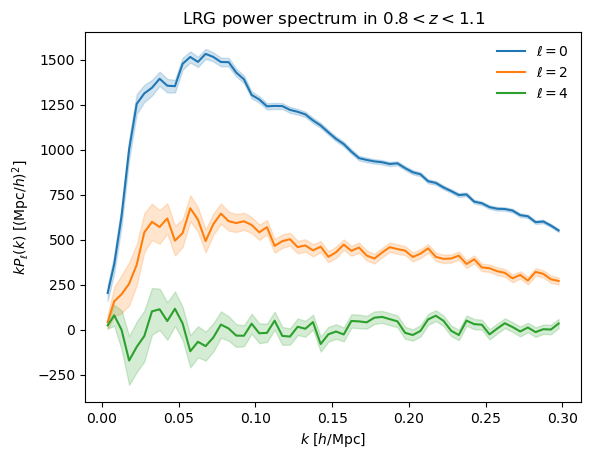

In [12]:
tracer, zrange = 'LRG', (0.8, 1.1)
spectrum = types.read(base_dir / f'data/spectrum/spectrum-poles_{tracer}_GCcomb_z{zrange[0]:.1f}-{zrange[1]:.1f}_thetacut0.05.h5')
covariance = types.read(base_dir / f'data/covariance/EZmock/covariance_spectrum-poles_{tracer}_GCcomb_z{zrange[0]:.1f}-{zrange[1]:.1f}_thetacut0.05.h5')

spectrum = spectrum.select(k=slice(0, None, 5)).select(k=(0., 0.3))  # rebin and select 0 <= k / [h/Mpc] < 0.3
covariance = covariance.at.observable.match(spectrum)

from matplotlib import pyplot as plt

ax = plt.gca()
ax.set_title(f'{tracer} power spectrum in ${zrange[0]:.1f} < z < {zrange[1]:.1f}$')
for ill, ell in enumerate(spectrum.ells):
    color = f'C{ill:d}'
    pole = spectrum.get(ells=ell)
    ax.plot(k:=pole.coords('k'), k * pole.value(), color=color, label=rf'$\ell={ell:d}$')
    std = covariance.at.observable.get(ells=ell).std()
    ax.fill_between(k, k * (pole.value() - std), k * (pole.value() + std), color=color, alpha=0.2)
ax.legend(frameon=False)
ax.set_xlabel(r'$k$ [$h/\mathrm{Mpc}$]')
ax.set_ylabel(r'$k P_{\ell}(k)$ [$(\mathrm{Mpc}/h)^2$]')
plt.show()

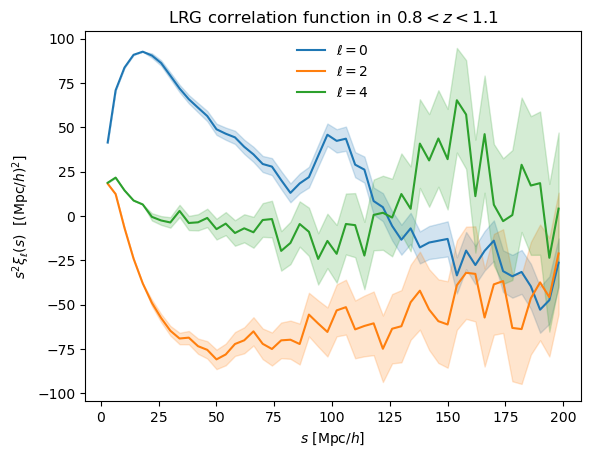

In [13]:
tracer, zrange = 'LRG', (0.8, 1.1)
correlation = types.read(base_dir / f'data/recsym/correlation/correlation-recsym-poles_{tracer}_GCcomb_z{zrange[0]:.1f}-{zrange[1]:.1f}.h5')
covariance = types.read(base_dir / f'data/covariance/RascalC/covariance_correlation-recsym-poles_{tracer}_GCcomb_z{zrange[0]:.1f}-{zrange[1]:.1f}.h5')

correlation = correlation.select(k=(50., 150.))  # select 50 <= s / [Mpc/h] < 150
covariance = covariance.at.observable.match(correlation)

from matplotlib import pyplot as plt

ax = plt.gca()
ax.set_title(f'{tracer} correlation function in ${zrange[0]:.1f} < z < {zrange[1]:.1f}$')
for ill, ell in enumerate(correlation.ells):
    color = f'C{ill:d}'
    pole = correlation.get(ells=ell)
    ax.plot(s:=pole.coords('s'), s**2 * pole.value(), color=color, label=rf'$\ell={ell:d}$')
    std = covariance.at.observable.get(ells=ell).std()
    ax.fill_between(s, s**2 * (pole.value() - std), s**2 * (pole.value() + std), color=color, alpha=0.2)
ax.legend(frameon=False)
ax.set_xlabel(r'$s$ [$\mathrm{Mpc}/h$]')
ax.set_ylabel(r'$s^2 \xi_\ell(s)$  [$(\mathrm{Mpc}/h)^2$]')
plt.show()

### Evaluate the likelihood

Here is the important piece if you'd like to write up the DESI DR1 Full-Shape + BAO likelihood.

In [18]:
likelihood = types.read(base_dir / 'data/likelihood/likelihood_spectrum-poles-rotated+bao-recon_syst-hod_LRG_GCcomb_z0.8-1.1_thetacut0.05.h5')
likelihood.observable.value()  # data array
# For the following observables
print(f'Likelihood for {likelihood.observable}')
likelihood.covariance.value()  # covariance matrix array
likelihood.window.value()  # window matrix array
window = likelihood.window
# For the following input theory
print(f'Required theory vector is {window.theory}')
# alpha_par, alpha_per: BAO (DH/rd) / (DH/rd)_fid, (DM/rd) / (DM/rd)_fid using the DESI fiducial cosmology (Planck2018)
baorecon = window.theory.get('baorecon')
print(f'which includes the BAO parameters {baorecon}')
# Fiducial values are stored here:
DM_over_rd_fid = baorecon.get('qper').attrs['DM_over_rd_fid']
DH_over_rd_fid = baorecon.get('qpar').attrs['DH_over_rd_fid']
# And can be obtained easily with:
from cosmoprimo.fiducial import DESI
from cosmoprimo import constants, Cosmology
fiducial = DESI()
zeff = baorecon.attrs['zeff']
DM_over_rd_fid = fiducial.comoving_angular_distance(zeff) / fiducial.rs_drag
DH_over_rd_fid = (constants.c / 1e3) / (100. * fiducial.efunc(zeff)) / fiducial.rs_drag
DV_over_rd_fid = DM_over_rd_fid**(2. / 3.) * DH_over_rd_fid**(1. / 3.) * zeff**(1. / 3.)

# Likelihood ($\chi^2$) can then be computed as:

def get_theory_spectrum(k, ells, zeff, shotnoise):
    # Assuming (obviously incorrect) input galaxy power spectrum = 0
    spectrum = []
    for ell in ells:  # loop over multipoles
        spectrum.append(np.zeros_like(k))
    return spectrum

def get_theory_bao(zeff):
    cosmo = Cosmology(Omega_m=0.3, engine='camb')  # and all other cosmological parameters
    DM_over_rd = cosmo.comoving_angular_distance(zeff) / cosmo.rs_drag
    DH_over_rd = (constants.c / 1e3) / (100. * cosmo.efunc(zeff)) / cosmo.rs_drag
    alpha_par = DH_over_rd / DH_over_rd_fid
    alpha_per = DM_over_rd / DM_over_rd_fid
    return np.atleast_1d(alpha_par), np.atleast_1d(alpha_per)

spectrum = get_theory_spectrum(k=window.theory.get('spectrum').get(0).coords('k'), # here, same for all multipoles
                               ells=window.theory.get('spectrum').ells, # here, [0, 2, 4]
                               zeff=likelihood.observable.get('spectrum').attrs['zeff'],
                               shotnoise=np.mean(likelihood.observable.get('spectrum').get(0).values('shotnoise')))
rotation = np.array([0., 0.])
print(f"Sample rotation with prior variance {window.theory.get('rotation').attrs['prior_variance']}")
photo = np.array([0.])
print(f"Sample photo with prior variance {window.theory.get('photo').attrs['prior_variance']}")
alpha_par, alpha_per = get_theory_bao(zeff)
theory = np.concatenate(spectrum + [rotation, photo] + [alpha_par, alpha_per])
likelihood.chi2(theory)
# Which is just:
# delta.dot(invcov).dot(delta) with invcov the inverse of likelihood.covariance.value()
# and delta = likelihood.observable.value() - window.value().dot(theory)

# Using the analytically-marginalized version, you can forget about nuisance parameters
# for "photo" and "rotation"
likelihood = types.read(base_dir / 'data/likelihood/likelihood_spectrum-poles-rotated+bao-recon_syst-rotation-hod-photo_LRG_GCcomb_z0.8-1.1_thetacut0.05.h5')
theory = np.concatenate(spectrum + [alpha_par, alpha_per])
likelihood.chi2(theory)

# For BGS and QSO, measured BAO is isotropic
likelihood = types.read(base_dir / 'data/likelihood/likelihood_spectrum-poles-rotated+bao-recon_syst-rotation-hod-photo_BGS_BRIGHT-21.5_GCcomb_z0.1-0.4_thetacut0.05.h5')

def get_theory_bao_iso(zeff):
    alpha_par, alpha_per = get_theory_bao(zeff)
    return alpha_par**(1. / 3.) * alpha_per**(2. / 3.)

qiso = get_theory_bao_iso(likelihood.observable.get('baorecon').attrs['zeff'])
theory = np.concatenate(spectrum + [qiso])
likelihood.chi2(theory)

# Likelihood without BAO
likelihood = types.read(base_dir / 'data/likelihood/likelihood_spectrum-poles-rotated_syst-rotation-hod-photo_BGS_BRIGHT-21.5_GCcomb_z0.1-0.4_thetacut0.05.h5')
theory = np.concatenate(spectrum)
likelihood.chi2(theory);

Likelihood for ObservableTree(labels=[{'observables': 'spectrum'}, {'observables': 'baorecon'}], size=74)
Required theory vector is ObservableTree(labels=[{'observables': 'spectrum'}, {'observables': 'rotation'}, {'observables': 'photo'}, {'observables': 'baorecon'}], size=1052)
which includes the BAO parameters ObservableTree(labels=[{'parameters': 'qpar'}, {'parameters': 'qper'}], size=2)
Sample rotation with prior variance [1406298.00782931    3707.55377932]
Sample photo with prior variance [0.04]


In [19]:
# ShapeFit likelihood
likelihood = types.read(base_dir / 'data/likelihood/likelihood_shapefit_spectrum-poles-rotated+bao-recon_syst-rotation-hod-photo_LRG_GCcomb_z0.8-1.1_thetacut0.05.h5')
# ['qiso', 'qap', 'df', 'dm']
# Where 'qiso', 'qap' are BAO parameters, 'df' is the growth rate relative to the fiducial value and 'dm' the tilt of the power spectrum
print(f'ShapeFit parameters: {likelihood.observable.get('shapefit').parameters}')

ShapeFit parameters: ['qiso', 'qap', 'df', 'dm']


In [20]:
# Post-reconstruction correlation function likelihood
likelihood = types.read(base_dir / 'data/likelihood/likelihood_correlation-recon-poles_LRG_GCcomb_z0.8-1.1.h5')
print(f'Post-reconstruction correlation function: {likelihood.observable}')

Post-reconstruction correlation function: Count2CorrelationPoles(labels=[{'ells': 0}, {'ells': 2}], size=52)


### Without **lsstypes**
Data is organized hierarchically. Let's explore some files!

In [21]:
import h5py

def print_type(name, obj):
    if isinstance(obj, h5py.Dataset):
        print(f"dataset: {name}")

# Power spectrum multipoles
with h5py.File(base_dir / 'data/spectrum/spectrum-poles_LRG_GCcomb_z0.8-1.1.h5', 'r') as data:
    data.visititems(print_type)
    # Multipoles
    ells = [int(ell) for ell in data['labels_values']]
    # To access the (shotnoise-subtracted) power spectrum monopole, k-coordinates, k-edges
    data['0/value'], data['0/k'], data['0/k_edges']
    # Similarly for the quadrupole
    data['2/value'], data['2/k'], data['4/k_edges']

# The power spectrum window matrix
with h5py.File(base_dir / 'data/spectrum/window_spectrum-poles-rotated_LRG_GCcomb_z0.8-1.1_thetacut0.05.h5', 'r') as data:
    data.visititems(print_type)
    # To access the window matrix value
    data['value']
    # The corresponding theory k-values
    ells = [int(ell) for ell in data['theory/labels_values']]
    data['theory/0/k'], data['theory/2/k'], data['theory/4/k']
    # And the observed k-values
    data['observable/0/k'], data['observable/2/k'], data['observable/4/k']

# Correlation function multipoles are very similar
with h5py.File(base_dir / 'data/recsym/correlation/correlation-recsym-poles_LRG_GCcomb_z0.8-1.1.h5', 'r') as data:
    data.visititems(print_type)
    # To access the correlation function monopole, s-coordinates, s-edges
    data['0/value'], data['0/s'], data['0/s_edges']
    # Similarly for the quadrupole
    data['2/value'], data['2/s'], data['4/s_edges']

# The correlation function window matrix follows the same scheme
with h5py.File(base_dir / 'data/recsym/correlation/window_correlation-recsym-poles_LRG_GCcomb_z0.8-1.1.h5', 'r') as data:
    data.visititems(print_type)
    # To access the window matrix value
    data['value']
    # The corresponding theory s-values
    ells = [int(ell) for ell in data['theory/labels_values']]
    data['theory/0/s'], data['theory/2/s'], data['theory/4/s']
    # And the observed s-values
    data['observable/0/s'], data['observable/2/s'], data['observable/4/s']

# Covariance
with h5py.File(base_dir / 'data/covariance/EZmock/covariance_spectrum-poles-rotated+bao-recon_LRG_GCcomb_z0.8-1.1_thetacut0.05.h5', 'r') as data:
    data.visititems(print_type)
    # To access the covariance matrix value
    data['value']
    # The corresponding observables
    # observable_names is 'spectrum', 'baorecon' *IN THIS ORDER IN THE COVARIANCE*
    observable_names = list(data['observable/labels_values'])
    # Monpole, quadrupole, hecadecapole k's
    data['observable/spectrum/0/k'], data['observable/spectrum/2/k'], data['observable/spectrum/4/k']
    # BAO parameters
    data['observable/baorecon/qpar'], data['observable/baorecon/qper']

# Likelihood includes data, window, covariance (including systematics) in the same files, with fiducial scale cuts
with h5py.File(base_dir / 'data/likelihood/likelihood_spectrum-poles-rotated+bao-recon_syst-hod_LRG_GCcomb_z0.8-1.1_thetacut0.05.h5') as data:
    # observable_names is 'spectrum', 'baorecon' *IN THIS ORDER*
    observable_names = list(data['observable/labels_values'])
    # To access data power spectrum multipoles
    data['observable/spectrum/0/value'], data['observable/spectrum/2/value']
    # Mean shot noise
    np.mean(data['observable/spectrum/0/num_shotnoise'][...] / data['observable/spectrum/0/norm'][...])
    # Effective redshift
    data['observable/spectrum'].attrs['zeff']
    # And post-reconstruction BAO
    data['observable/baorecon/qpar'], data['observable/baorecon/qper']
    # Joint covariance matrix
    data['covariance/value']
    # And *joint* window matrix
    data['window/value']
    # For theory *IN THIS ORDER* (obtained with data['window/theory/labels_values']):
    data['window/theory/spectrum/0/k'], data['window/theory/spectrum/2/k'], data['window/theory/spectrum/4/k'], data['window/theory/photo'], data['window/theory/rotation'], data['window/theory/baorecon/qpar'], data['window/theory/baorecon/qper']

dataset: 0/coords_names
dataset: 0/k
dataset: 0/k_edges
dataset: 0/meta/ell
dataset: 0/name
dataset: 0/nmodes
dataset: 0/norm
dataset: 0/num_shotnoise
dataset: 0/value
dataset: 0/values_names
dataset: 2/coords_names
dataset: 2/k
dataset: 2/k_edges
dataset: 2/meta/ell
dataset: 2/name
dataset: 2/nmodes
dataset: 2/norm
dataset: 2/num_shotnoise
dataset: 2/value
dataset: 2/values_names
dataset: 4/coords_names
dataset: 4/k
dataset: 4/k_edges
dataset: 4/meta/ell
dataset: 4/name
dataset: 4/nmodes
dataset: 4/norm
dataset: 4/num_shotnoise
dataset: 4/value
dataset: 4/values_names
dataset: labels_names
dataset: labels_values
dataset: name
dataset: name
dataset: observable/0/coords_names
dataset: observable/0/k
dataset: observable/0/k_edges
dataset: observable/0/meta/ell
dataset: observable/0/name
dataset: observable/0/nmodes
dataset: observable/0/norm
dataset: observable/0/num_shotnoise
dataset: observable/0/value
dataset: observable/0/values_names
dataset: observable/2/coords_names
dataset: obser